### Importing Modules

In [87]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

### Plotting with the age feature

95


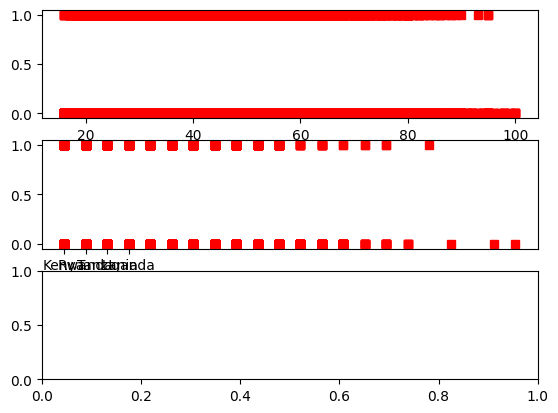

In [11]:
df = pd.read_csv("Train.csv")
df['bank_account'] = df['bank_account'].map({'Yes': 1, 'No': 0})
had_ba = []
had_no_ba = []
for i in range(len(df['bank_account'])):
    if df['bank_account'][i] == 1:
        had_ba.append(df["age_of_respondent"][i])
    else:
        had_no_ba.append(df["age_of_respondent"][i])
ba_age = sum(had_ba)/len(had_ba)
no_ba_age = sum(had_no_ba)/len(had_no_ba)
print(max(had_ba))
fig, ax = plt.subplots(3)
ax[0].plot(df["age_of_respondent"], df["bank_account"], "rs")
ax[0].set_title = "age_of_respondent"
ax[1].plot(df["household_size"], df["bank_account"], "rs")
ax[1].set_title = "household_size"

### Data Preprocessing

In [64]:
def one_hot_encoding(df, feature):
    uniq_relations = list(df[feature].unique())
    # To get the same order of features in the prediction
    uniq_relations.sort()
    for unq in uniq_relations:
        df[unq] = np.where(df[feature] == unq, 1, 0)
    df = df.drop(feature, axis="columns")
    return df


def process_data(ds):
    df = pd.read_csv(ds)
    df = df.drop("uniqueid", axis='columns')
    #df = df.drop("age_of_respondent", axis="columns")
    #df = df.drop("country", axis="columns")
    df = df.drop("year", axis="columns")
    
    #countries = ['Afghanistan', 'Aland Islands', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia, Plurinational State of', 'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island', 'Brazil', 'British Indian Ocean Territory', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Congo, The Democratic Republic of the', 'Cook Islands', 'Costa Rica', "Côte d'Ivoire", 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Islands (Malvinas)', 'Faroe Islands', 'Fiji', 'Finland', 'France', 'French Guiana', 'French Polynesia', 'French Southern Territories', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Heard Island and McDonald Islands', 'Holy See (Vatican City State)', 'Honduras', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Republic of', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', "Korea, Democratic People's Republic of", 'Korea, Republic of', 'Kuwait', 'Kyrgyzstan', "Lao People's Democratic Republic", 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macao', 'Macedonia, Republic of', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritania', 'Mauritius', 'Mayotte', 'Mexico', 'Micronesia, Federated States of', 'Moldova, Republic of', 'Monaco', 'Mongolia', 'Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestinian Territory, Occupied', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Réunion', 'Romania', 'Russian Federation', 'Rwanda', 'Saint Barthélemy', 'Saint Helena, Ascension and Tristan da Cunha', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Martin (French part)', 'Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Georgia and the South Sandwich Islands', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'South Sudan', 'Svalbard and Jan Mayen', 'Swaziland', 'Sweden', 'Switzerland', 'Syrian Arab Republic', 'Taiwan, Province of China', 'Tajikistan', 'Tanzania, United Republic of', 'Thailand', 'Timor-Leste', 'Togo', 'Tokelau', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'United States Minor Outlying Islands', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela, Bolivarian Republic of', 'Viet Nam', 'Virgin Islands, British', 'Virgin Islands, U.S.', 'Wallis and Futuna', 'Yemen', 'Zambia', 'Zimbabwe']
    #countries = [name.split(",")[0] for name in countries]
    #countries = {name : i for i, name in enumerate(countries)}
    df["household_size"] = np.where(df["household_size"] >= 17.5, 1, 0)
    
    #for i in range(len(df["country"])):
    #    df["country"][i] = sum([ord(i) for i in df["country"][i]])

    #gender based on 1 for Male

    df['gender_of_respondent'] = df['gender_of_respondent'].map({'Male': 1, 'Female': 0})
    
    if 'bank_account' in df.columns:
        df['bank_account'] = df['bank_account'].map({'Yes': 1, 'No': 0})

    df["cellphone_access"] = df["cellphone_access"].map({'Yes': 1, 'No': 0})


    df = one_hot_encoding(df, "relationship_with_head")
    df = one_hot_encoding(df, "marital_status")
    df = one_hot_encoding(df, "education_level")
    df = one_hot_encoding(df, "job_type")
    df = one_hot_encoding(df, "country")
    df = one_hot_encoding(df, "location_type")

    return df

df = process_data("Train.csv")
df_test = pd.read_csv("Test.csv")

submission = [[df_test["uniqueid"][i] + " x " + df_test["country"][i], 0] for i in range(len(df_test["uniqueid"]))]

X_test = process_data("Test.csv")

X_train = df.loc[:, df.columns != "bank_account"]
y_train = df["bank_account"]

df.to_csv("pre_processed_train.csv", encoding='utf-8', index=False)

In [65]:
print(X_train)
print()
print()
print()
print(set(X_test.columns))
#print(y_train)

       cellphone_access  household_size  age_of_respondent  \
0                     1               0                 24   
1                     0               0                 70   
2                     1               0                 26   
3                     1               0                 34   
4                     0               0                 26   
...                 ...             ...                ...   
23519                 1               0                 48   
23520                 1               0                 27   
23521                 1               0                 27   
23522                 1               0                 30   
23523                 1               0                 20   

       gender_of_respondent  Child  Head of Household  Other non-relatives  \
0                         0      0                  0                    0   
1                         0      0                  1                    0   
2                    

## Training 

In [66]:
xgbc = xgb.XGBClassifier()
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

# Prediction

In [75]:
y_pred = xgbc.predict(X_test)

# Testing

/home/zdo/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


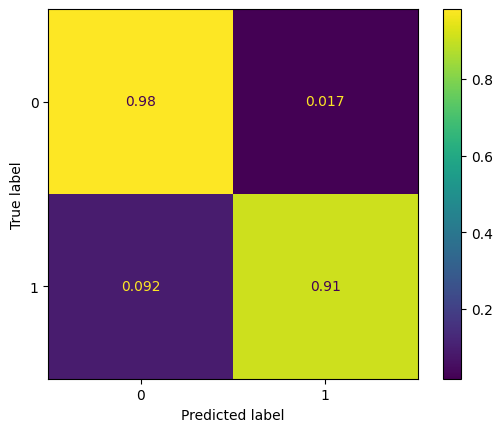

In [80]:
y_test = df = pd.read_csv("first_submission.csv")["bank_account"]
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(xgbc,X_test, y_test,normalize='true')

# calculating Error

In [78]:
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of XGB classifier:  0.02260559190957767


# Optimization

In [92]:
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 10]
        }
xgboost = GridSearchCV(xgbc, param_grid,n_jobs=-1,verbose=2,cv=5)
xgboost.fit(X_train, y_train)
best_params = xgboost.best_params_
print(best_params)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[01:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=1.0; total time=   2.0s
[01:14:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=1.0; total time=   1.9s
[01:14:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=1.0; total time=   1.9s
[01:14:22] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=0.8; total time=   2.1s
[01:14:24] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=5, min_child_weighth=1, subsample=0.6; total time=   3.7s
[01:14:28] WARNING: ..

[01:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=0.6; total time=   2.4s
[01:14:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=0.8; total time=   2.1s
[01:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=1.0; total time=   1.9s
[01:14:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=1.0; total time=   1.9s
[01:14:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=5, min_child_weighth=1, subsample=0.8; total time=   3.6s
[01:14:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are 

[01:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=0.8; total time=   2.3s
[01:14:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=0.6; total time=   2.3s
[01:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=0.6; total time=   2.3s
[01:14:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=1.0; total time=   1.9s
[01:14:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=5, min_child_weighth=1, subsample=1.0; total time=   3.2s
[01:14:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are

[01:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=0.6; total time=   2.3s
[01:14:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=0.6; total time=   2.3s
[01:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=0.8; total time=   2.2s
[01:14:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=1.0; total time=   1.9s
[01:14:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=5, min_child_weighth=1, subsample=0.8; total time=   3.5s
[01:14:29] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are

[01:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=0.8; total time=   2.2s
[01:14:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=1.0; total time=   2.0s
[01:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=1.0; total time=   1.9s
[01:14:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=0.8; total time=   2.2s
[01:14:25] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=5, min_child_weighth=1, subsample=0.8; total time=   3.6s
[01:14:28] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are 

{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.6}


# Testing after Optimization

In [95]:
xgbc = xgb.XGBClassifier(
    min_child_weight=best_params["min_child_weighth"],
    gamma=best_params["gamma"],
    subsample=best_params["subsample"],
    max_depth=best_params["max_depth"]
)

xgbc.fit(X_train, y_train)
y_pred = xgbc.predict(X_test)

print("Error rate of XGB classifier: ", 1 - accuracy_score(y_test, y_pred))

Error rate of XGB classifier:  0.013979773944080898


# My Testing && save the pred file

In [96]:
for i in range(len(y_pred)):
    submission[i][1] = y_pred[i]

sub = pd.DataFrame(submission)
sub = sub.rename(columns={0: "unique_id", 1: "bank_account"})
sub.to_csv("Submission.csv", encoding='utf-8', index=False)

In [97]:
df = pd.read_csv("first_submission.csv")
diff=0
him=df["bank_account"]
for i in range(len(sub["bank_account"])):
    if sub["bank_account"][i] != him[i]:
        diff+=1
print(diff)

141
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=0.8; total time=   4.2s
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=0.6; total time=   4.5s
[01:14:17] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=1, subsample=0.8; total time=   2.2s
[01:14:19] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=5, subsample=0.6; total time=   2.3s
[01:14:21] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=3, min_child_weighth=10, subsample=0.6; total time=   2.3s
[01:14:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=0.5, max_depth=5, min_child_weighth=1, subsample=0.6; total time=   3.8s
[01:14:27] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not u

[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=1.0; total time=   3.4s
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=0.8; total time=   3.9s
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=1.0; total time=   2.5s
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=0.8; total time=   3.7s
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=0.6; total time=   4.3s
[01:22:37] WARNING: ../src/learner.cc:767: 
Parameters: { "min_child_weighth" } are not used.

[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=1.0; total time=   2.2s
[CV] END gamma=1, max_depth=5, min_child_weighth=10, subsample=1.0; total time=   2.8s
